# Model `AssoTrans`

An example of prediction task using `AssoTrans` with `RatioSplit`. The improvement upon `Asso` is not guaranteed.

In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [7]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 2023


[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] model        : <models.Asso.Asso object at 0x000002A44C8DCCA0>
[I] verbose      : False
[I] display      : False
[I] task         : prediction


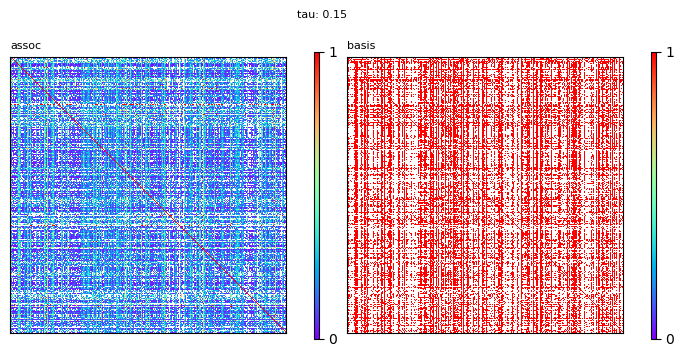

100%|██████████| 5/5 [00:06<00:00,  1.35s/it]                

5 5
[W] Stopped in advance: Reach requested factor


train                                                \
                              0                                                 
                time  k   score score_0.5 desc_len      shape    TP       TPR   
0  07/06/24 06:14:55  0  1231.0   -1385.0  10486.0  [80, 109]  2975  0.395244   
1  07/06/24 06:14:56  1  1450.8   -1813.5  11469.0   [31, 95]  3627  0.481865   
2  07/06/24 06:14:58  2  1570.6   -2334.5  12610.0   [56, 43]  4174  0.554537   
3  07/06/24 06:14:59  3  1657.2   -2395.5  12807.0   [11, 64]  4359  0.579115   
4  07/06/24 06:15:00  4  1725.6   -2493.0  13154.0  [19, 133]  4538  0.602896   

                                                                               \
                                                                                
       FP       FPR      FN       FNR       ERR       ACC    Recall Precision   
0  1419.0  0.188521  4552.0  0.604756  0.396639  0.603361  0.395244  0.677060   
1  1692.0  0.224791  3900.0  0.518135  0.371463  0.628537  0.481865  0.681895   
2  2025.0  0.269031  3353.0  0.445463  0.357247  0.642753  0.554537  0.673334   
3  2063.0  0.274080  3168.0  0.420885  0.347482  0.652518  0.579115  0.678761   
4  2141.0  0.284443  2989.0  0.397104  0.340773  0.659227  0.602896  0.679443   

             val                                                        \
               0                                                         
         F1   TP       TPR     FP       FPR     FN       FNR       ERR   
0  0.499119  410  0.381041  204.0  0.189591  666.0  0.618959  0.404275   
1  0.564689  486  0.451673  244.0  0.226766  590.0  0.548327  0.387546   
2  0.608189  558  0.518587  289.0  0.268587  518.0  0.481413  0.375000   
3  0.624991  581  0.539963  294.0  0.273234  495.0  0.460037  0.366636   
4  0.638885  605  0.562268  306.0  0.284387  471.0  0.437732  0.361059   

                                           test                             \
                                              0                              
        ACC    Recall Precision        F1    TP       TPR     FP       FPR   
0  0.595725  0.381041  0.667752  0.485207   815  0.378894  406.0  0.188749   
1  0.612454  0.451673  0.665753  0.538206   958  0.445374  486.0  0.225941   
2  0.625000  0.518587  0.658796  0.580343  1092  0.507671  582.0  0.270572   
3  0.633364  0.539963  0.664000  0.595592  1117  0.519293  594.0  0.276151   
4  0.638941  0.562268  0.664105  0.608958  1151  0.535100  618.0  0.287308   

                                                                       
                                                                       
       FN       FNR       ERR       ACC    Recall Precision        F1  
0  1336.0  0.621106  0.404928  0.595072  0.378894  0.667486  0.483393  
1  1193.0  0.554626  0.390284  0.609716  0.445374  0.663435  0.532962  
2  1059.0  0.492329  0.381450  0.618550  0.507671  0.652330  0.570980  
3  1034.0  0.480707  0.378429  0.621571  0.519293  0.652835  0.578457  
4  1000.0  0.464900  0.376104  0.623896  0.535100  0.650650  0.587245

<Figure size 640x480 with 0 Axes>

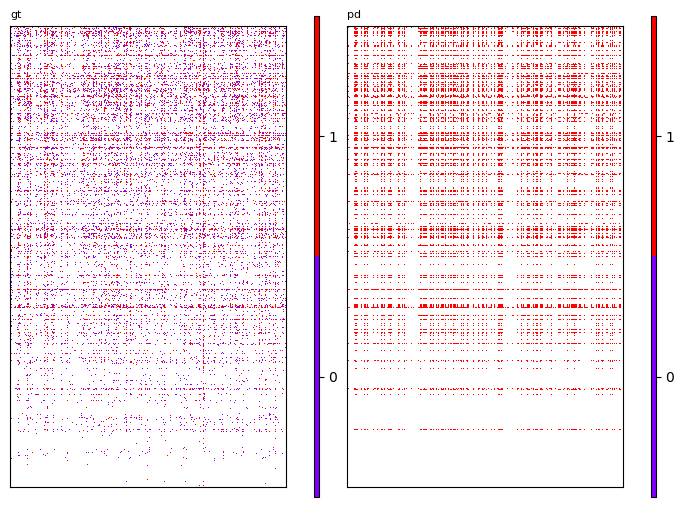

[I] model saved as: 24-06-07_18-15-00_Asso.pickle


<Figure size 640x480 with 0 Axes>

In [8]:
from models import Asso, TransposedModel

k = 5
tau = 0.15
w_fp = 0.2

model_asso = Asso(k=k, tau=tau, w_fp=w_fp)

model_trans = TransposedModel(model=model_asso)
model_trans.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)